In [124]:
import pandas as pd

try:
    era5 = pd.read_csv('rowsMatching2020ObservationsDates.csv')
    print(era5) # Print the first few rows to verify
except FileNotFoundError:
    print("Error: File not found. Please ensure the file 'rowsMatching2020ObservationsDates.csv' is in the current working directory or provide the correct path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


      latitude  longitude           valid_time       msl    sst  \
0         28.0      -79.0  2020-05-16 18:00:00  100933.0  299.0   
1         28.0      -78.0  2020-05-16 18:00:00  101065.0  299.0   
2         28.0      -78.0  2020-05-17 00:00:00  100989.0  299.0   
3         29.0      -78.0  2020-05-17 00:00:00  100933.0  298.0   
4         29.0      -78.0  2020-05-17 06:00:00  100975.0  298.0   
...        ...        ...                  ...       ...    ...   
3062      13.0      -87.0  2020-11-18 06:00:00  100860.0    NaN   
3063      14.0      -88.0  2020-11-18 06:00:00  100931.0    NaN   
3064      14.0      -87.0  2020-11-18 06:00:00  100989.0    NaN   
3065      13.0      -89.0  2020-11-18 12:00:00  100836.0  301.0   
3066      14.0      -89.0  2020-11-18 12:00:00  101077.0  301.0   

      vertical_wind_shear  relative_humidity  vorticity  
0                3.730620          65.402400   0.000176  
1                4.696961          73.052444   0.000144  
2               11.20

In [34]:
import pandas as pd
import json

try:
    with open('processed-hurdat2.json', 'r') as f:
        hurdat = json.load(f)
    print(hurdat)
except FileNotFoundError:
    print("Error: 'processed-hurdat2.json' not found. Please upload the file or provide the correct path.")
except json.JSONDecodeError:
    print("Error: Invalid JSON format in the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

[{'storm_id': '1950', 'name': 'ABLE', 'num_records': 51, 'observations': [{'date': '1950-08-12', 'time': '00:00 UTC', 'latitude': 17.1, 'longitude': -55.5, 'wind_speed': 35, 'pressure': -999}, {'date': '1950-08-12', 'time': '06:00 UTC', 'latitude': 17.7, 'longitude': -56.3, 'wind_speed': 40, 'pressure': -999}, {'date': '1950-08-12', 'time': '12:00 UTC', 'latitude': 18.2, 'longitude': -57.4, 'wind_speed': 45, 'pressure': -999}, {'date': '1950-08-12', 'time': '18:00 UTC', 'latitude': 19.0, 'longitude': -58.6, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '00:00 UTC', 'latitude': 20.0, 'longitude': -60.0, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '06:00 UTC', 'latitude': 20.7, 'longitude': -61.1, 'wind_speed': 50, 'pressure': -999}, {'date': '1950-08-13', 'time': '12:00 UTC', 'latitude': 21.3, 'longitude': -62.2, 'wind_speed': 55, 'pressure': -999}, {'date': '1950-08-13', 'time': '18:00 UTC', 'latitude': 22.0, 'longitude': -63.2, 'wind_speed

In [35]:
hurdatObs = [(obs['latitude'], obs['longitude']) for i in hurdat for obs in i['observations']]
print(hurdatObs)

[(17.1, -55.5), (17.7, -56.3), (18.2, -57.4), (19.0, -58.6), (20.0, -60.0), (20.7, -61.1), (21.3, -62.2), (22.0, -63.2), (22.7, -63.8), (23.1, -64.6), (23.4, -65.4), (23.9, -66.0), (24.4, -66.2), (24.8, -66.5), (25.2, -66.8), (25.5, -67.5), (25.7, -68.1), (25.7, -68.7), (25.5, -69.3), (25.4, -69.8), (25.4, -70.6), (25.4, -71.5), (25.5, -72.6), (25.9, -73.3), (26.7, -73.9), (27.3, -74.4), (27.9, -74.9), (28.4, -75.3), (29.1, -75.5), (29.9, -75.5), (30.7, -75.5), (31.7, -75.5), (32.8, -75.2), (34.4, -74.3), (36.0, -72.7), (37.6, -71.0), (39.3, -69.4), (41.2, -67.3), (43.3, -65.0), (44.6, -63.7), (45.5, -62.6), (47.9, -59.8), (50.0, -56.8), (52.0, -53.8), (53.6, -50.7), (54.7, -47.7), (55.3, -44.8), (55.3, -41.8), (54.5, -37.7), (53.5, -33.7), (52.5, -30.3), (12.0, -54.0), (12.5, -54.2), (13.0, -54.4), (13.5, -54.7), (14.0, -55.0), (14.5, -55.4), (15.0, -55.9), (15.5, -56.4), (16.0, -57.0), (16.3, -57.9), (16.6, -58.8), (16.8, -59.8), (16.9, -60.6), (17.0, -61.0), (17.0, -61.4), (16.9, -6

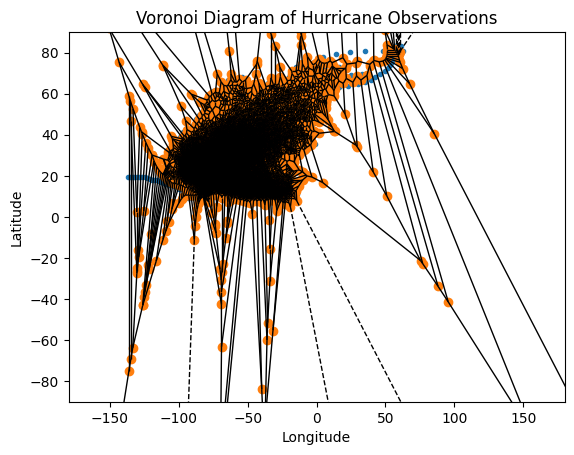

In [36]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

hurdatObs = np.array(hurdatObs)
# Swap columns in the input data
hurdatObs_swapped = hurdatObs[:, [1, 0]]

# Create the Voronoi diagram
vor = Voronoi(hurdatObs_swapped)

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor)
plt.title('Voronoi Diagram of Hurricane Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

In [53]:
import numpy as np
from scipy.spatial import cKDTree

def create_enhanced_points(hurdat):
    enhanced_points = []

    for hurricane in hurdat:
        storm_id = hurricane['storm_id']
        storm_name = hurricane['name']

        for obs in hurricane['observations']:
            enhanced_points.append((
                obs['latitude'],
                obs['longitude'],
                storm_id,
                storm_name,
                obs['date'],
                obs['time']
            ))

    # Convert to NumPy array for KD-tree calculations
    # hurdatObs = np.array([(point[0], point[1]) for point in enhanced_points])

    return enhanced_points

def find_closest_points_with_kdtree(enhanced_points, hurdatObs, query_point, k=5, ignoreHurricane=''):
    # Create KD-tree
    tree = cKDTree(hurdatObs)

    # Find k nearest neighbors
    distances, indices = tree.query(query_point, k=k)

    # Ensure distances is always an array, even for single point
    if not isinstance(distances, np.ndarray):
        distances = np.array([distances])
        indices = np.array([indices])

    # Retrieve full information for these points
    closest_points = [
        {
            'coordinates': (enhanced_points[idx][0], enhanced_points[idx][1]),
            'storm_id': enhanced_points[idx][2],
            'storm_name': enhanced_points[idx][3],
            'date': enhanced_points[idx][4],
            'time': enhanced_points[idx][5],
            'distance': dist
        }
        for idx, dist in zip(indices, distances) if enhanced_points[idx][3] + enhanced_points[idx][2] != ignoreHurricane
    ]

    return closest_points

enhanced_points = create_enhanced_points(hurdat)

# Find 5 closest points using KD-tree
query_point = (10, 10)
closest_points = find_closest_points_with_kdtree(enhanced_points, hurdatObs, query_point, k=5)

def print_closest_points(closest_points):
    # Print results
    for point in closest_points:
        print(f"Storm: {point['storm_name']} (ID: {point['storm_id']})")
        print(f"Coordinates: {point['coordinates']}")
        print(f"Date: {point['date']}, Time: {point['time']}")
        print(f"Distance: {point['distance']:.4f}")
        print("---")

print_closest_points(closest_points)

Storm: CHRISTINE (ID: 1973)
Coordinates: (11.0, -14.0)
Date: 1973-08-25, Time: 12:00 UTC
Distance: 24.0208
---
Storm: CHRISTINE (ID: 1973)
Coordinates: (10.9, -15.2)
Date: 1973-08-25, Time: 18:00 UTC
Distance: 25.2161
---
Storm: CHRISTINE (ID: 1973)
Coordinates: (10.8, -16.4)
Date: 1973-08-26, Time: 00:00 UTC
Distance: 26.4121
---
Storm: HELENE (ID: 2018)
Coordinates: (13.4, -16.8)
Date: 2018-09-07, Time: 12:00 UTC
Distance: 27.0148
---
Storm: FLORENCE (ID: 2018)
Coordinates: (12.8, -16.9)
Date: 2018-08-30, Time: 06:00 UTC
Distance: 27.0453
---


In [51]:
katrinaObs = [(obs['latitude'], obs['longitude']) for i in hurdat if i['name'] == 'KATRINA' and i['storm_id'] == '2005' for obs in i['observations']]
print(katrinaObs)

[(23.1, -75.1), (23.4, -75.7), (23.8, -76.2), (24.5, -76.5), (25.4, -76.9), (26.0, -77.7), (26.1, -78.4), (26.2, -79.0), (26.2, -79.6), (26.0, -80.1), (25.9, -80.3), (25.4, -81.3), (25.1, -82.0), (24.9, -82.6), (24.6, -83.3), (24.4, -84.0), (24.4, -84.7), (24.5, -85.3), (24.8, -85.9), (25.2, -86.7), (25.7, -87.7), (26.3, -88.6), (27.2, -89.2), (28.2, -89.6), (29.3, -89.6), (29.5, -89.6), (30.2, -89.6), (31.1, -89.6), (32.6, -89.1), (34.1, -88.6), (35.6, -88.0), (37.0, -87.0), (38.6, -85.3), (40.1, -82.9)]


In [95]:
hurricaneFreq = {}
totalDist = {}
for katrinaPoint in katrinaObs:
    closest_points = find_closest_points_with_kdtree(enhanced_points, hurdatObs, katrinaPoint, k=5, ignoreHurricane='KATRINA2005')
    # print_closest_points(closest_points)
    for point in closest_points:
        storm_name = point['storm_name'] + ' ' + point['storm_id']
        hurricaneFreq[storm_name] = hurricaneFreq.get(storm_name, 0) + 1
        totalDist[storm_name] = totalDist.get(storm_name, 0) + abs(point['distance'])

# Print the hurricane frequency
for storm_name, frequency in hurricaneFreq.items():
    if frequency > 2:
        print(f"{storm_name}: {frequency}, totalDist: {totalDist[storm_name]}, avgDist: {totalDist[storm_name]/frequency}")

RITA 2005: 3, totalDist: 0.8767828935632341, avgDist: 0.292260964521078
CELIA 1966: 4, totalDist: 0.8828427124746183, avgDist: 0.22071067811865458
BETSY 1965: 3, totalDist: 1.4281428994687038, avgDist: 0.4760476331562346
ERIN 1995: 3, totalDist: 1.0123105625617632, avgDist: 0.3374368541872544
ANA 1991: 3, totalDist: 0.7576491222541428, avgDist: 0.2525497074180476
IVAN 2004: 4, totalDist: 0.9255832815336824, avgDist: 0.2313958203834206
KING 1950: 3, totalDist: 0.447213595499958, avgDist: 0.14907119849998599
FAY 2008: 3, totalDist: 0.7773387165490522, avgDist: 0.25911290551635074
EASY 1950: 3, totalDist: 1.1403124237432811, avgDist: 0.3801041412477604
GRETA 1970: 3, totalDist: 0.6656854249492379, avgDist: 0.22189514164974597
ETA 2020: 3, totalDist: 0.7472135954999694, avgDist: 0.2490711984999898
ETHEL 1960: 3, totalDist: 0.8300563079745752, avgDist: 0.27668543599152506
DENNIS 2005: 3, totalDist: 0.9596256060378567, avgDist: 0.31987520201261893


In [58]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 65.3 MB/s eta 0:00:00


In [93]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_hurricane_paths(data):
    # Create a figure and an axis with a map projection
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add map features
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

    # Set extent for the Atlantic view (lon_min, lon_max, lat_min, lat_max)
    ax.set_extent([-100, 0, 0, 50], crs=ccrs.PlateCarree())

    # Plot each path
    for path in data:
        latitudes = [point[0] for point in path]
        longitudes = [point[1] for point in path]
        ax.plot(longitudes, latitudes, marker='o', linestyle='-', label=path[0][2], transform=ccrs.PlateCarree())

    # Add legend and title
    plt.legend()
    plt.title('Atlantic Hurricane Paths')
    plt.show()


In [82]:
def getObservationsForHurricane(name, storm_id, includeStormName=False):
    result = []
    for i in hurdat:
        if i['name'] == name and i['storm_id'] == storm_id:
            for obs in i['observations']:
                if includeStormName:
                    result.append((obs['latitude'], obs['longitude'], i['name'] + ' ' + i['storm_id']))
                else:
                    result.append((obs['latitude'], obs['longitude']))
    # return [(obs['latitude'], obs['longitude']) for i in hurdat if i['name'] == name and i['storm_id'] == storm_id for obs in i['observations']]
    return result

In [90]:
katrinaCloseHurricanes = [getObservationsForHurricane('KATRINA', '2005', True)]

for storm_name, frequency in hurricaneFreq.items():
    if frequency > 3:
        print(f"{storm_name}: {frequency}, totalDist: {totalDist[storm_name]}, avgDist: {totalDist[storm_name]/frequency}")
        katrinaCloseHurricanes.append(getObservationsForHurricane(storm_name.split()[0], storm_name.split()[1], True))


CELIA 1966: 4, totalDist: 0.8828427124746183, avgDist: 0.22071067811865458
IVAN 2004: 4, totalDist: 0.9255832815336824, avgDist: 0.2313958203834206
[[(23.1, -75.1, 'KATRINA 2005'), (23.4, -75.7, 'KATRINA 2005'), (23.8, -76.2, 'KATRINA 2005'), (24.5, -76.5, 'KATRINA 2005'), (25.4, -76.9, 'KATRINA 2005'), (26.0, -77.7, 'KATRINA 2005'), (26.1, -78.4, 'KATRINA 2005'), (26.2, -79.0, 'KATRINA 2005'), (26.2, -79.6, 'KATRINA 2005'), (26.0, -80.1, 'KATRINA 2005'), (25.9, -80.3, 'KATRINA 2005'), (25.4, -81.3, 'KATRINA 2005'), (25.1, -82.0, 'KATRINA 2005'), (24.9, -82.6, 'KATRINA 2005'), (24.6, -83.3, 'KATRINA 2005'), (24.4, -84.0, 'KATRINA 2005'), (24.4, -84.7, 'KATRINA 2005'), (24.5, -85.3, 'KATRINA 2005'), (24.8, -85.9, 'KATRINA 2005'), (25.2, -86.7, 'KATRINA 2005'), (25.7, -87.7, 'KATRINA 2005'), (26.3, -88.6, 'KATRINA 2005'), (27.2, -89.2, 'KATRINA 2005'), (28.2, -89.6, 'KATRINA 2005'), (29.3, -89.6, 'KATRINA 2005'), (29.5, -89.6, 'KATRINA 2005'), (30.2, -89.6, 'KATRINA 2005'), (31.1, -89.6,

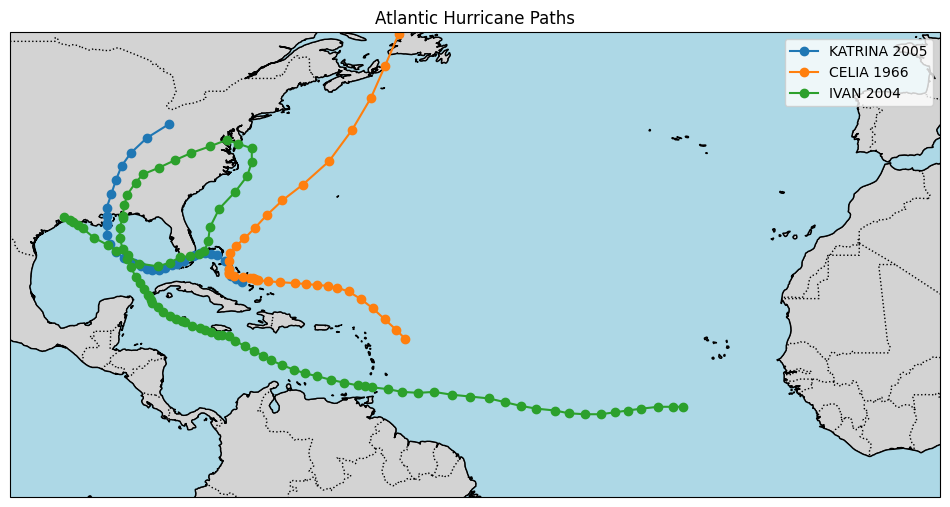

In [94]:
plot_hurricane_paths(katrinaCloseHurricanes)

----
KATRINA 2005


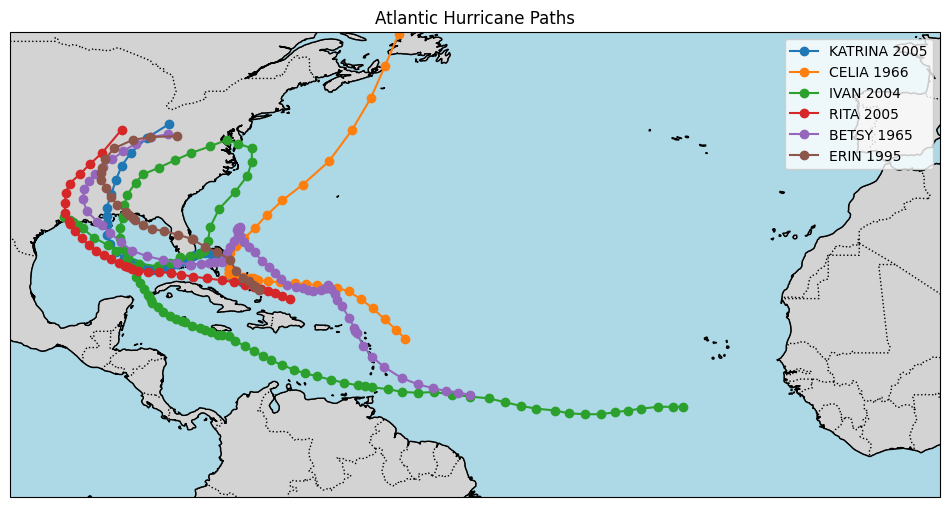

----
HARVEY 2017


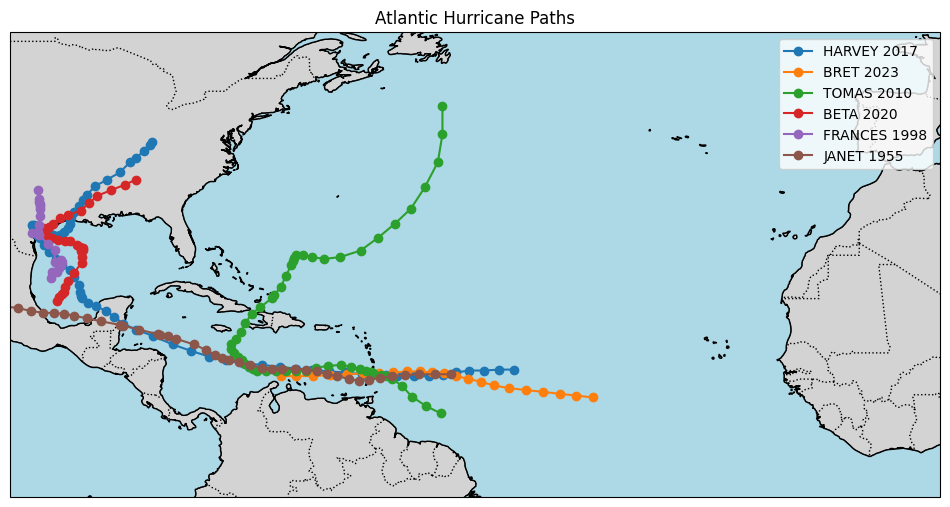

----
IAN 2022


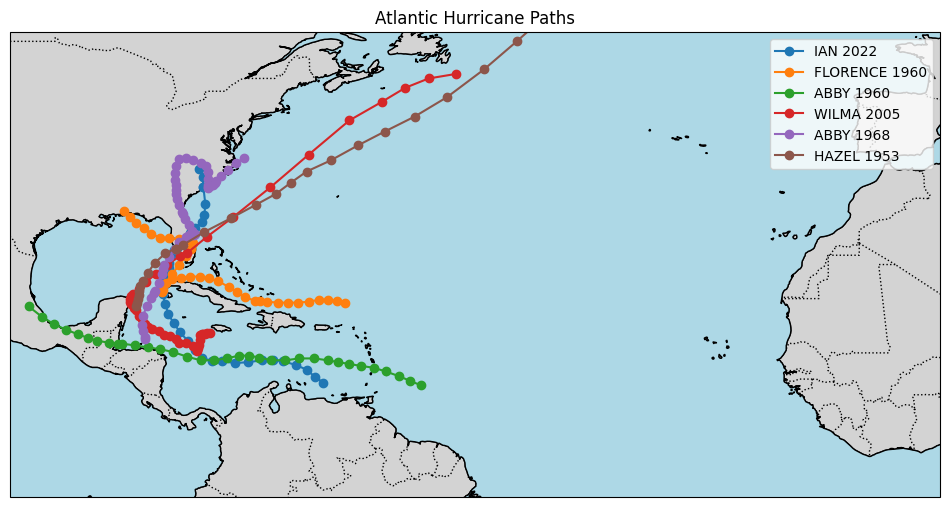

----
MARIA 2017


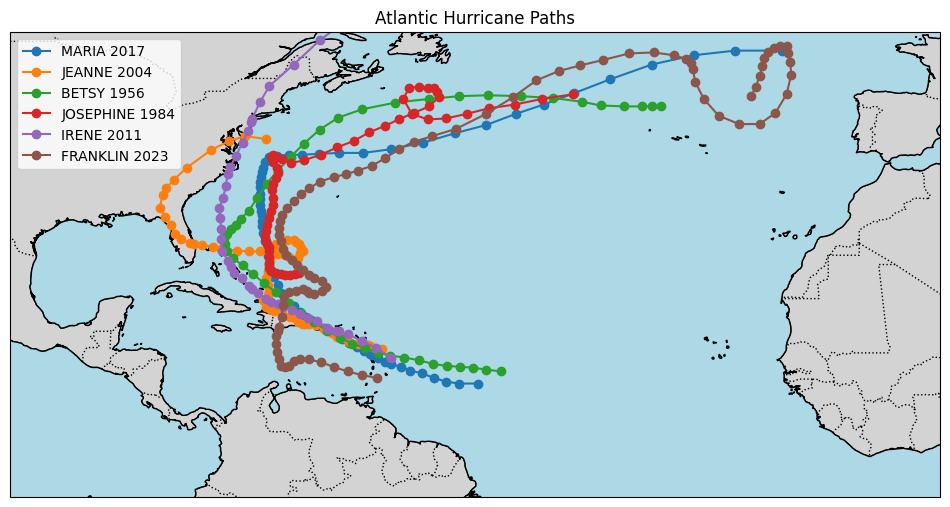

----
IRMA 2017


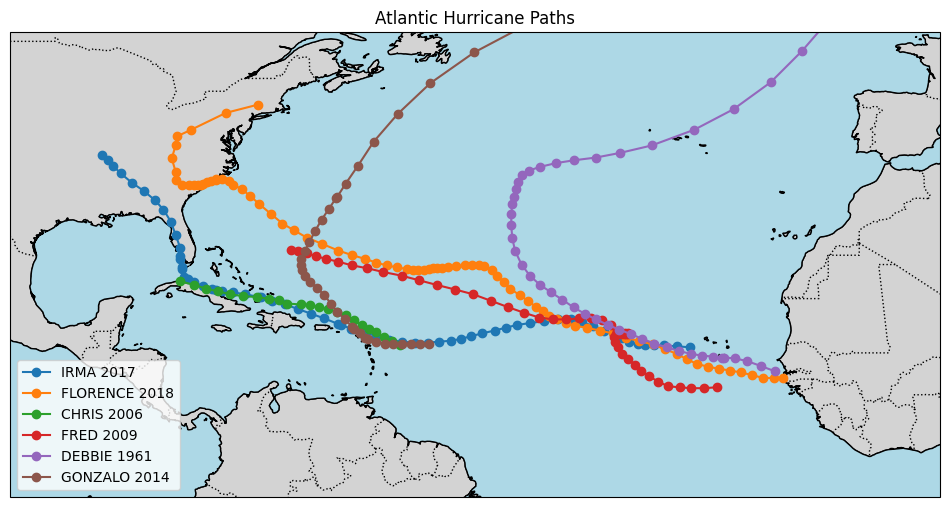

In [110]:
hurricanesToAnalyze = [('KATRINA', '2005'), ('HARVEY', '2017'), ('IAN', '2022'), ('MARIA', '2017'), ('IRMA', '2017')]

for name,year in hurricanesToAnalyze:
    print('----')
    print(name, year)
    hurricaneObs = [(obs['latitude'], obs['longitude']) for i in hurdat if i['name'] == name and i['storm_id'] == year for obs in i['observations']]

    hurricaneFreq = {}
    totalDist = {}
    for point in hurricaneObs:
        closest_points = find_closest_points_with_kdtree(enhanced_points, hurdatObs, point, k=5, ignoreHurricane=name+year)
        # print_closest_points(closest_points)
        for point in closest_points:
            storm_name = point['storm_name'] + ' ' + point['storm_id']
            hurricaneFreq[storm_name] = hurricaneFreq.get(storm_name, 0) + 1
            totalDist[storm_name] = totalDist.get(storm_name, 0) + abs(point['distance'])

    closeHurricanes = [getObservationsForHurricane(name, year, True)]
    sorted_hurricaneFreq = sorted(hurricaneFreq.items(), key=lambda item: item[1], reverse=True)
    for storm_name, frequency in sorted_hurricaneFreq:
        # if frequency > 3:
        # print(f"{storm_name}: {frequency}, totalDist: {totalDist[storm_name]}, avgDist: {totalDist[storm_name]/frequency}")
        closeHurricanes.append(getObservationsForHurricane(storm_name.split()[0], storm_name.split()[1], True))

    plot_hurricane_paths(closeHurricanes[0:6])

In [125]:
era5 = era5.drop('valid_time', axis=1)
era5 = era5.dropna()
era5 = era5.to_numpy()
era5

array([[ 2.8000000e+01, -7.9000000e+01,  1.0093300e+05, ...,
         3.7306197e+00,  6.5402400e+01,  1.7558565e-04],
       [ 2.8000000e+01, -7.8000000e+01,  1.0106500e+05, ...,
         4.6969610e+00,  7.3052444e+01,  1.4369120e-04],
       [ 2.8000000e+01, -7.8000000e+01,  1.0098900e+05, ...,
         1.1209113e+01,  7.1477080e+01,  1.4986984e-04],
       ...,
       [ 1.3000000e+01, -8.8000000e+01,  1.0074000e+05, ...,
         1.5612284e+01,  9.8965570e+01,  2.3323270e-04],
       [ 1.3000000e+01, -8.9000000e+01,  1.0083600e+05, ...,
         1.2168504e+01,  9.7515305e+01,  3.8495113e-04],
       [ 1.4000000e+01, -8.9000000e+01,  1.0107700e+05, ...,
         1.1011721e+01,  9.9241070e+01,  7.1163784e-05]])

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

# Create the Voronoi diagram
vor = Voronoi(era5)

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor)
plt.title('Voronoi Diagram of Hurricane Observations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()